In [1]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load data
url = "https://raw.githubusercontent.com/uras-alkaya/AI-Projects/refs/heads/main/teknasyon-case-ai-datascientist-3/datasets/churn_train.csv"
df = pd.read_csv(url)

In [3]:
# 2. Data Analysis
print("Dataset shape:", df.shape)
print("\nSample data:")
df.head()

Dataset shape: (60000, 66)

Sample data:


,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,202550,1835,0,1,9.66,2.26,1,1,...,45.35,0.0,26.62,0.00,390,10,115,10,0.0,0
1,2013,6,930164,536,0,10,54.92,0.60,1,1,...,24.98,0.0,23.90,0.00,52,0,52,0,0.0,0
2,2013,6,46907,1046,0,1,16.25,13.47,1,1,...,116.47,15.2,65.65,31.28,262,0,199,11,0.0,0
3,2013,8,1174456,15947,0,8,0.00,0.00,1,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.0,0
4,2013,6,300131,1630,0,1,6.14,3.76,1,1,...,30.38,0.0,8.00,0.00,61,0,60,0,0.0,0


In [4]:
print("\nData type information:")
df.info()


Data type information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        60000 non-null  int64  
 1   month                                       60000 non-null  int64  
 2   user_account_id                             60000 non-null  int64  
 3   user_lifetime                               60000 non-null  int64  
 4   user_intake                                 60000 non-null  int64  
 5   user_no_outgoing_activity_in_days           60000 non-null  int64  
 6   user_account_balance_last                   60000 non-null  float64
 7   user_spendings                              60000 non-null  float64
 8   user_has_outgoing_calls                     60000 non-null  int64  
 9   user_has_outgoing_sms                       60000 non-null 

In [5]:
print("\nMissing value check:")
df.isnull().sum()


Missing value check:


,0
year,0
month,0
user_account_id,0
user_lifetime,0
user_intake,0
...,...
last_100_sms_outgoing_to_onnet_count,0
last_100_sms_outgoing_to_offnet_count,0
last_100_sms_outgoing_to_abroad_count,0
last_100_gprs_usage,0


In [6]:
# Search for negative values in numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    if (df[col] < 0).sum() > 0:
        print(f"{col} column has {(df[col] < 0).sum()} negative values.")

user_spendings column has 7 negative values.
reloads_sum column has 49 negative values.
sms_outgoing_spendings column has 2 negative values.
sms_outgoing_to_offnet_spendings column has 2 negative values.
sms_incoming_spendings column has 10 negative values.
gprs_spendings column has 48 negative values.
last_100_reloads_sum column has 32 negative values.


In [7]:
# Correct negative values with the median
columns_with_negatives = [
    "user_spendings",
    "reloads_sum",
    "sms_outgoing_spendings",
    "sms_outgoing_to_offnet_spendings",
    "sms_incoming_spendings",
    "gprs_spendings",
    "last_100_reloads_sum"
]

for col in columns_with_negatives:
    median_val = df.loc[df[col] >= 0, col].median()
    neg_count = (df[col] < 0).sum()
    df.loc[df[col] < 0, col] = median_val
    print(f"{col}: {neg_count} negative values were replaced with the median ({median_val}).")

user_spendings: 7 negative values were replaced with the median (2.28).
reloads_sum: 49 negative values were replaced with the median (0.0).
sms_outgoing_spendings: 2 negative values were replaced with the median (0.12).
sms_outgoing_to_offnet_spendings: 2 negative values were replaced with the median (0.0).
sms_incoming_spendings: 10 negative values were replaced with the median (0.0).
gprs_spendings: 48 negative values were replaced with the median (0.0).
last_100_reloads_sum: 32 negative values were replaced with the median (12.0).


In [8]:
# Check for negative values again
for col in columns_with_negatives:
    if (df[col] < 0).any():
        print(f"{col}: There are still negatives!")
    else:
        print(f"{col}: All negatives were corrected ✅")

user_spendings: All negatives were corrected ✅
reloads_sum: All negatives were corrected ✅
sms_outgoing_spendings: All negatives were corrected ✅
sms_outgoing_to_offnet_spendings: All negatives were corrected ✅
sms_incoming_spendings: All negatives were corrected ✅
gprs_spendings: All negatives were corrected ✅
last_100_reloads_sum: All negatives were corrected ✅


In [9]:
print("\nBasic statistics:")
df.drop(columns=["year", "month", "user_account_id"]).describe().T


Basic statistics:


,count,mean,std,min,25%,50%,75%,max
user_lifetime,60000.0,4010.707750,6062.226966,0.0,456.00,1217.00,1985.00,15947.00
user_intake,60000.0,0.041083,0.198485,0.0,0.00,0.00,0.00,1.00
user_no_outgoing_activity_in_days,60000.0,64.040017,264.162578,0.0,1.00,2.00,8.00,1307.00
user_account_balance_last,60000.0,9.626972,18.506703,0.0,0.04,5.26,12.91,1775.71
user_spendings,60000.0,6.823849,13.623014,0.0,0.00,2.28,8.09,510.11
...,...,...,...,...,...,...,...,...
last_100_sms_outgoing_to_onnet_count,60000.0,7.273817,35.763351,0.0,0.00,0.00,1.00,2829.00
last_100_sms_outgoing_to_offnet_count,60000.0,62.447717,187.079702,0.0,0.00,5.00,51.00,13860.00
last_100_sms_outgoing_to_abroad_count,60000.0,3.049600,25.564016,0.0,0.00,0.00,0.00,4692.00
last_100_gprs_usage,60000.0,5.660140,71.594183,0.0,0.00,0.00,0.00,5571.22


In [10]:
print("\nCount records for each churn group:")
df.groupby("churn").size().reset_index(name="count")


Count records for each churn group:


,churn,count
0,0,47451
1,1,12549


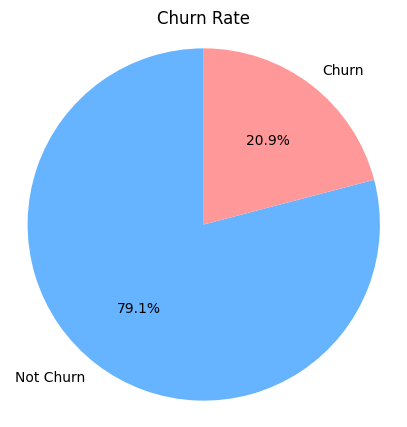


Overall churn rate: 20.91%


In [11]:
# Churn rate (percentage)
churn_counts = df["churn"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    churn_counts,
    labels=["Not Churn", "Churn"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"]
)
plt.title("Churn Rate")
plt.axis("equal")
plt.show()

churn_rate = df["churn"].mean()
print(f"\nOverall churn rate: {churn_rate:.2%}")

In [12]:
# In this part, we examine the original churn distribution of the data.
# This distribution is 47k churn=0 and 12k churn=1.

# Because this distribution is imbalanced, the model may give weak results.
# Therefore, after EDA, we will split the data into train-test and apply SMOTE only to the training data.

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

# 1. Separate features and target
X = df.drop("churn", axis=1)
y = df["churn"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. (Optional) Feature Scaling – required for some models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 5. See the new distribution
print("Original distribution:", Counter(y_train))
print("Balanced distribution:", Counter(y_train_balanced))

Original distribution: Counter({0: 37961, 1: 10039})
Balanced distribution: Counter({0: 37961, 1: 37961})


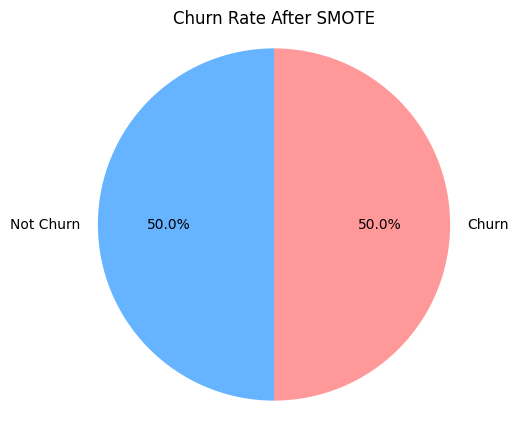


Overall Churn rate after SMOTE (resampled training set): 50.00%


In [14]:
# Churn rate after SMOTE
churn_counts_resampled = y_train_balanced.value_counts()

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(
    churn_counts_resampled,
    labels=["Not Churn", "Churn"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"]
)
plt.title("Churn Rate After SMOTE")
plt.axis("equal")
plt.show()

# Calculate the rate
churn_rate_resampled = y_train_balanced.mean()
print(f"\nOverall Churn rate after SMOTE (resampled training set): {churn_rate_resampled:.2%}")

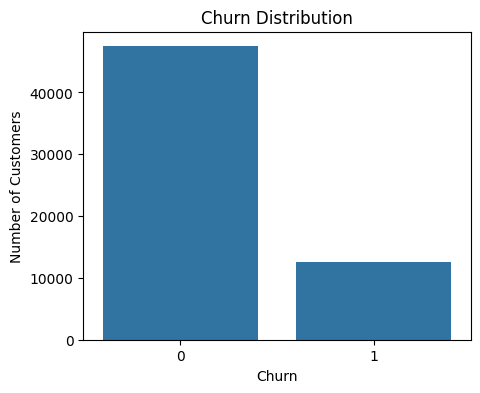

In [15]:
# 3. Visualization
# Target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

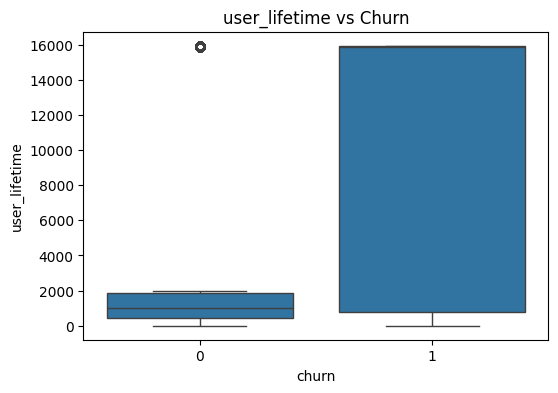

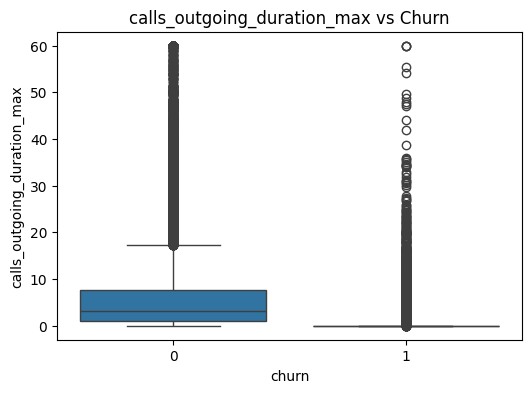

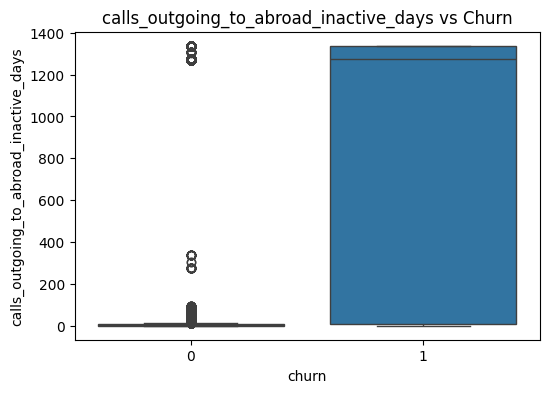

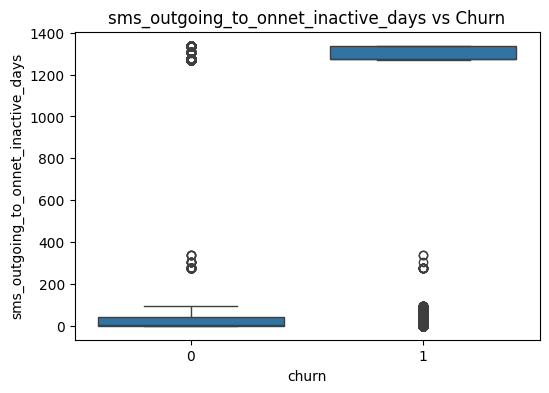

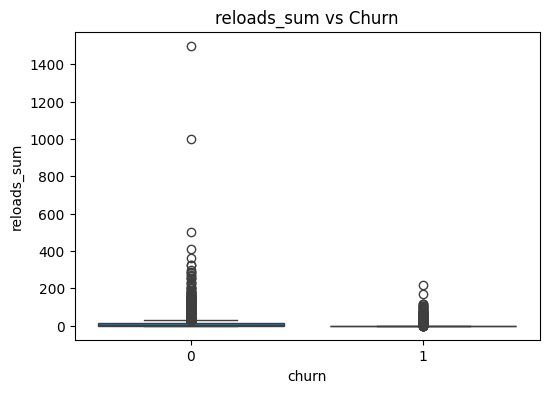

In [16]:
# Distribution of selected features by churn status
churn_analysis_features = ["user_lifetime", "calls_outgoing_duration_max", "calls_outgoing_to_abroad_inactive_days", "sms_outgoing_to_onnet_inactive_days", "reloads_sum"]

for col in churn_analysis_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

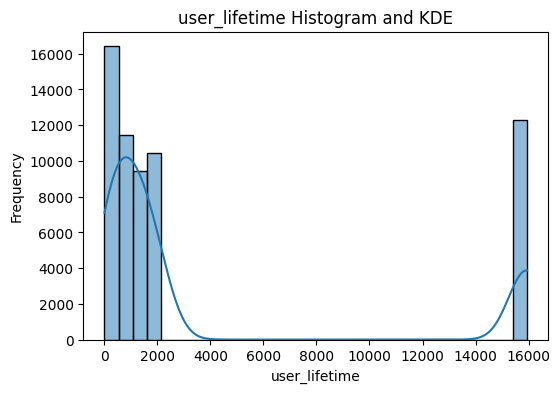

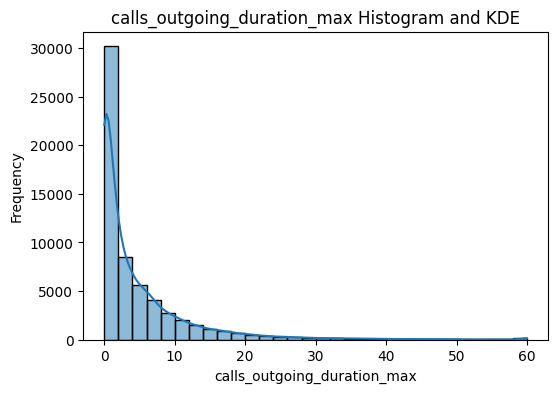

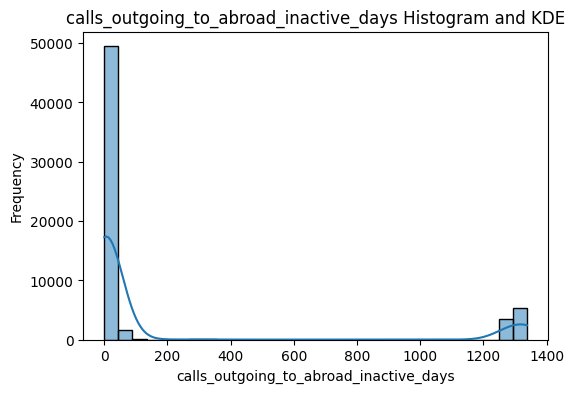

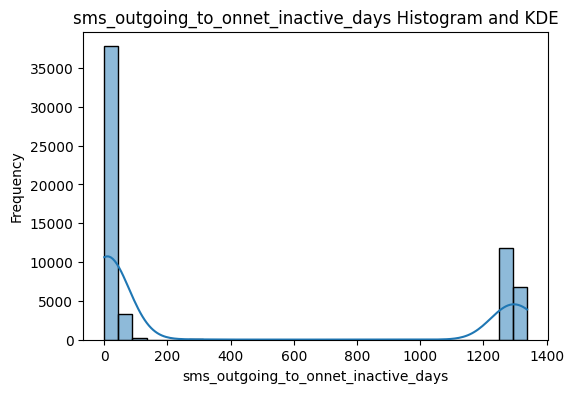

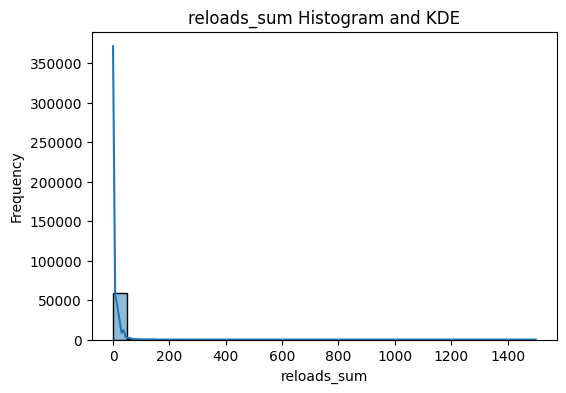

In [17]:
# Histogram + KDE
for col in churn_analysis_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Histogram and KDE")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [18]:
print("\n--- Outlier Analysis (IQR Method) ---\n")

outlier_indices = set()

for col in churn_analysis_features:
    Q1 = df[col].quantile(0.10)
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    outlier_indices.update(outliers.index)

    print(f"{col}:")
    print(f"   Q1 = {Q1:.2f}")
    print(f"   Q3 = {Q3:.2f}")
    print(f"   IQR = {IQR:.2f}")
    print(f"   Lower Bound = {lower_bound:.2f}")
    print(f"   Upper Bound = {upper_bound:.2f}")
    print(f"   Number of outliers = {num_outliers}\n")

# Overall total
total_outlier_rows = len(outlier_indices)
total_rows = df.shape[0]
outlier_ratio = total_outlier_rows / total_rows * 100

print(f"Total number of unique outlier rows: {total_outlier_rows}")
print(f"Total number of rows: {total_rows}")
print(f"Ratio of rows with outliers in the dataset: {outlier_ratio:.2f}%")


--- Outlier Analysis (IQR Method) ---

user_lifetime:
   Q1 = 176.00
   Q3 = 15947.00
   IQR = 15771.00
   Lower Bound = -23480.50
   Upper Bound = 39603.50
   Number of outliers = 0

calls_outgoing_duration_max:
   Q1 = 0.00
   Q3 = 12.95
   IQR = 12.95
   Lower Bound = -19.42
   Upper Bound = 32.38
   Number of outliers = 858

calls_outgoing_to_abroad_inactive_days:
   Q1 = 1.00
   Q3 = 1276.00
   IQR = 1275.00
   Lower Bound = -1911.50
   Upper Bound = 3188.50
   Number of outliers = 0

sms_outgoing_to_onnet_inactive_days:
   Q1 = 1.00
   Q3 = 1338.00
   IQR = 1337.00
   Lower Bound = -2004.50
   Upper Bound = 3343.50
   Number of outliers = 0

reloads_sum:
   Q1 = 0.00
   Q3 = 24.02
   IQR = 24.02
   Lower Bound = -36.03
   Upper Bound = 60.05
   Number of outliers = 733

Total number of unique outlier rows: 1454
Total number of rows: 60000
Ratio of rows with outliers in the dataset: 2.42%



Average values by churn status (Selected Features):
churn                                             0             1
user_lifetime                           2359.832606  10253.091720
calls_outgoing_duration_max                5.823401      0.872947
calls_outgoing_to_abroad_inactive_days    68.168553    687.347836
sms_outgoing_to_onnet_inactive_days      246.444100   1036.740696
reloads_sum                                9.421833      1.535054


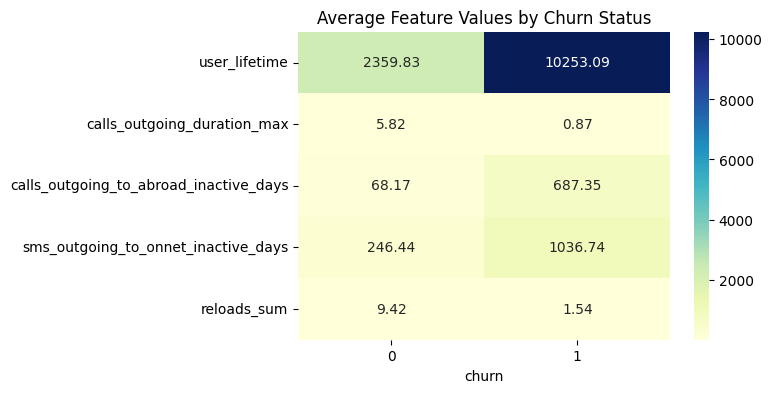

In [19]:
# Average feature by churn status
churn_means = df.groupby("churn")[churn_analysis_features].mean().T
print("\nAverage values by churn status (Selected Features):")
print(churn_means)

# Average feature heatmap by churn status
plt.figure(figsize=(6,4))
sns.heatmap(churn_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Feature Values by Churn Status")
plt.show()

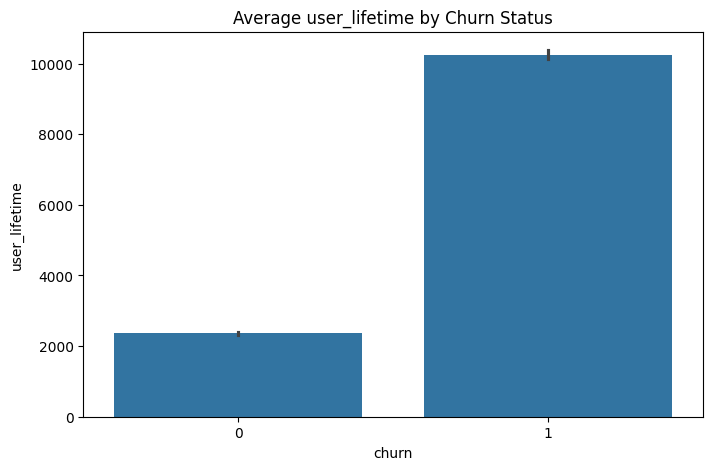

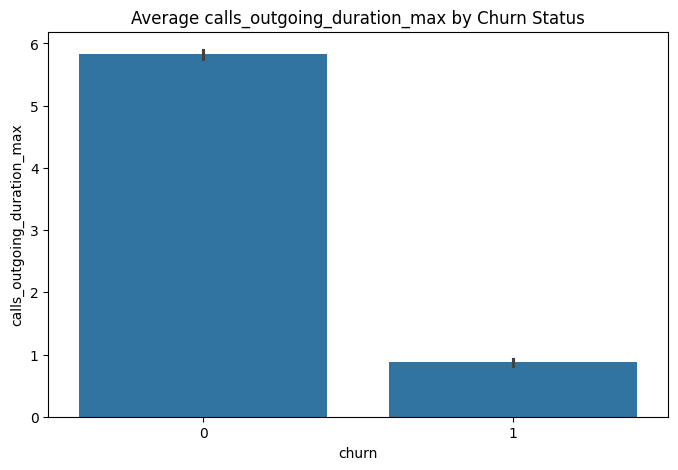

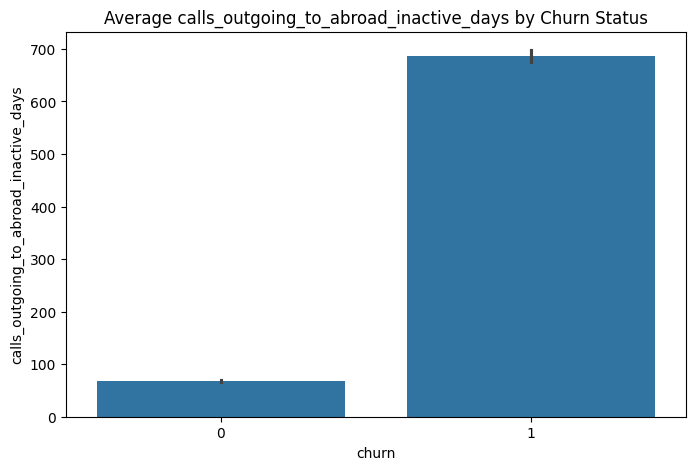

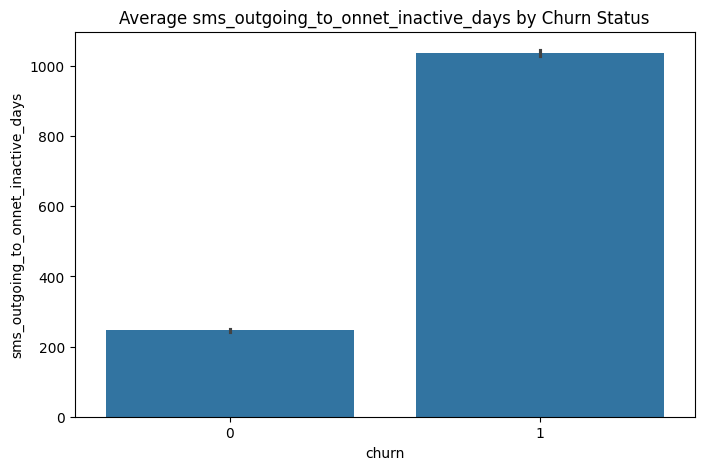

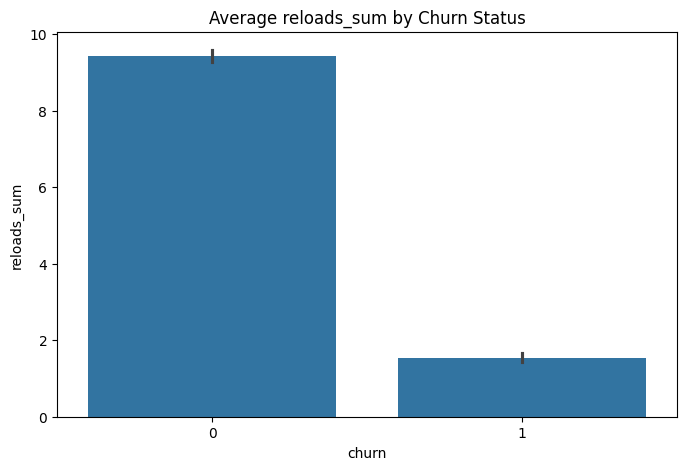

In [20]:
# Average features barplot by churn status
for col in churn_analysis_features:
    plt.figure(figsize=(8,5))
    sns.barplot(x="churn", y=col, data=df)
    plt.title(f"Average {col} by Churn Status")
    plt.show()

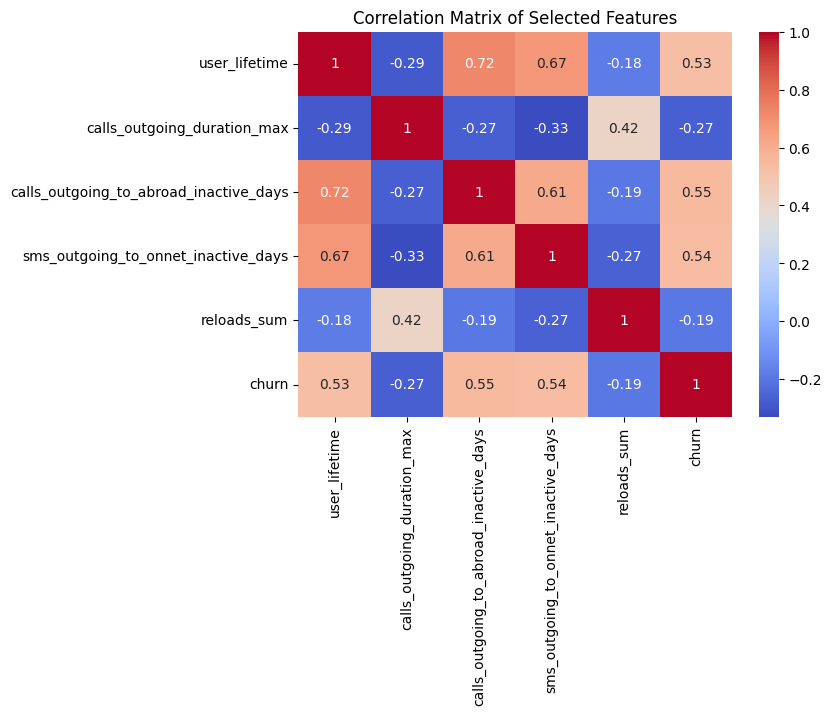

In [21]:
# Correlation matrix
selected_cols = ["user_lifetime", "calls_outgoing_duration_max", "calls_outgoing_to_abroad_inactive_days", "sms_outgoing_to_onnet_inactive_days", "reloads_sum", "churn"]

plt.figure(figsize=(7,5))
corr_matrix = df[selected_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [22]:
# Find features most correlated with churn
corr_with_churn = corr_matrix["churn"].sort_values(ascending=False)
print("Features with Highest Correlation to Churn:\n", corr_with_churn)

Features with Highest Correlation to Churn:
 churn                                     1.000000
calls_outgoing_to_abroad_inactive_days    0.546338
sms_outgoing_to_onnet_inactive_days       0.539443
user_lifetime                             0.529546
reloads_sum                              -0.191135
calls_outgoing_duration_max              -0.268828
Name: churn, dtype: float64


Text(0.5, 1.02, 'Pairplot of Selected Features')

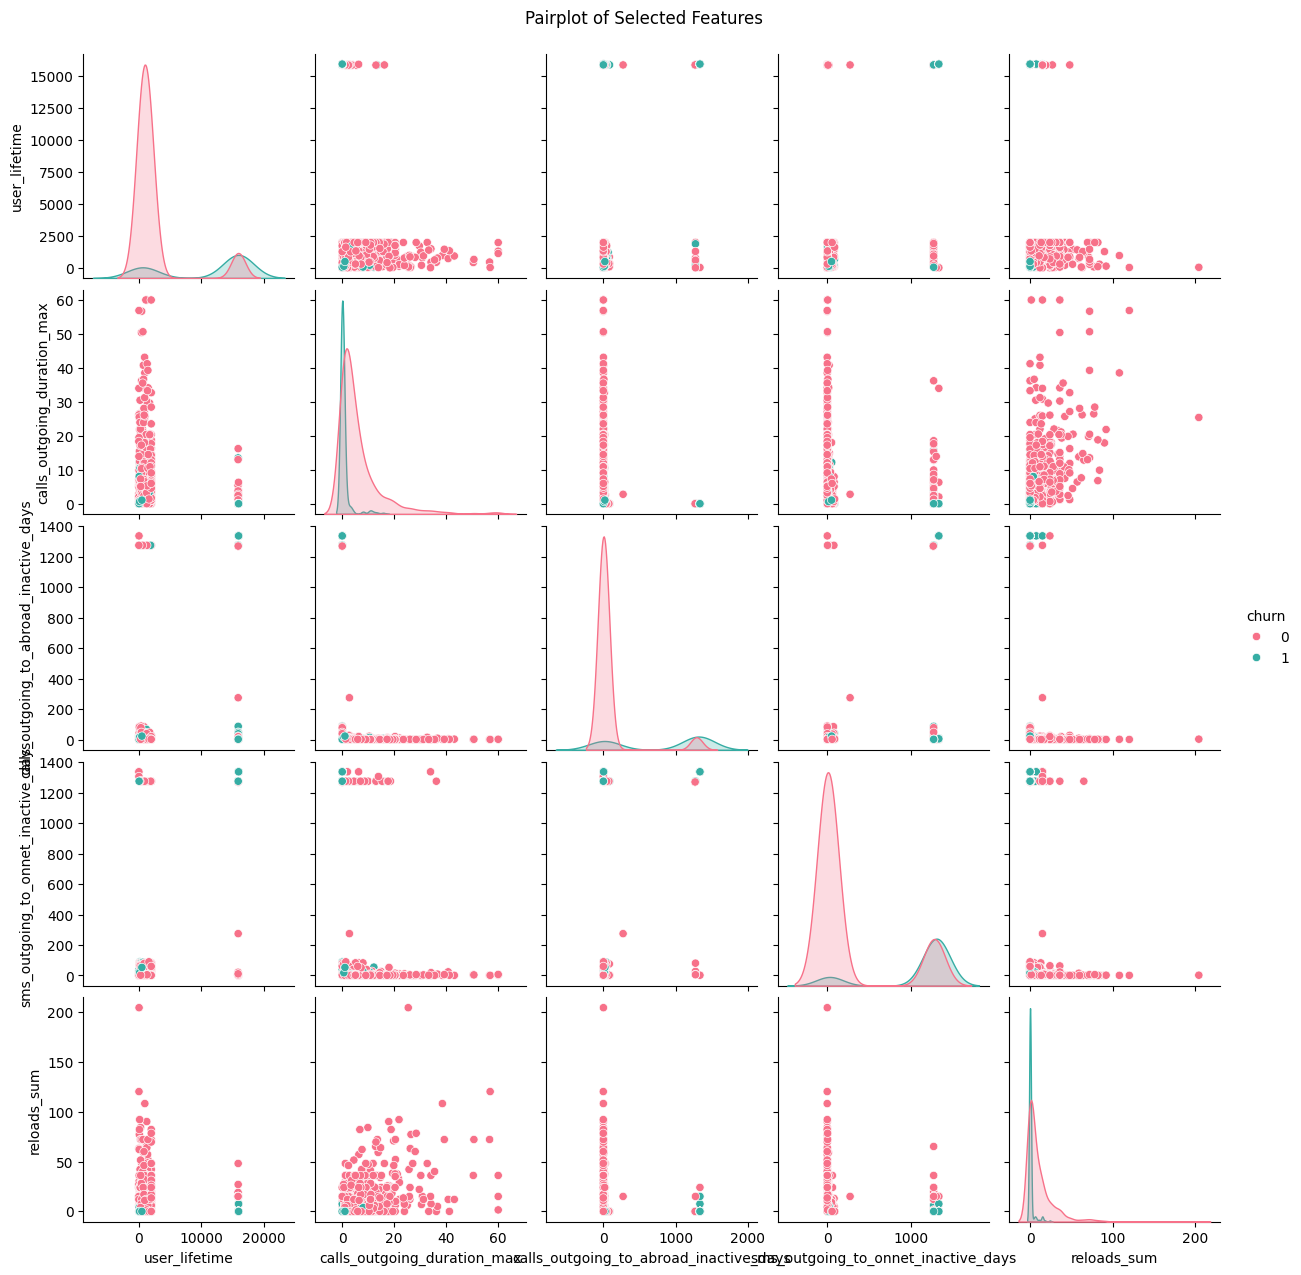

In [23]:
# Pairplot (selected features)
sns.pairplot(df[selected_cols].sample(1000, random_state=42), hue="churn", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)

                                        Min      Max
user_lifetime                           0.0  15947.0
calls_outgoing_duration_max             0.0     60.0
calls_outgoing_to_abroad_inactive_days  0.0   1338.0
sms_outgoing_to_onnet_inactive_days     0.0   1338.0
reloads_sum                             0.0   1500.0


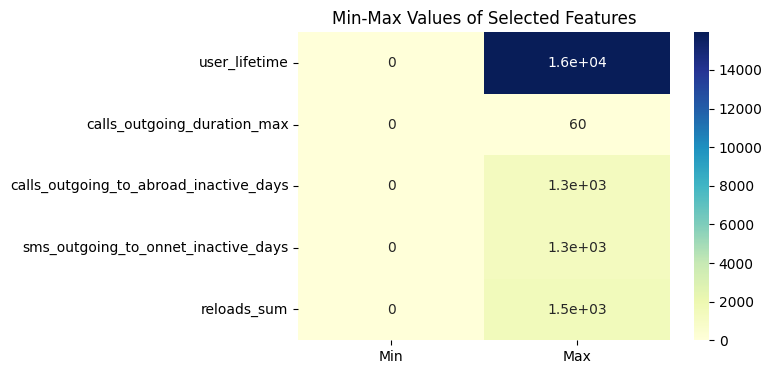

In [24]:
# Create Min-Max table
min_max_df = pd.DataFrame({
    "Min": df[churn_analysis_features].min(),
    "Max": df[churn_analysis_features].max()
})
print(min_max_df)

# Min-Max Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(min_max_df, annot=True, cmap="YlGnBu")
plt.title("Min-Max Values of Selected Features")
plt.show()